<a href="https://colab.research.google.com/github/gopinathak-geek/Image-classification-with-pytorch/blob/main/NovoFullyconnected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import numpy as np
import tqdm as tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy import stats
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split


In [82]:
train_csv = pd.read_csv('data/training.csv')
test_csv = pd.read_csv('data/testing.csv')

In [83]:
class NovoDataset:
    def __init__(self, data, test=False):
        self.data = data
        self.test = test
        
    def data_proteinsequence(self):
        information = []
        for index, row in self.data.iterrows():
            ph = row['pH']
            proteinSequence = row['protein_sequence']
            
            if self.test:
                a = self.test_proteinsequence_data(proteinSequence, ph)
                information.append(a)
            else:
                tm = row['tm']
                a = self.proteinsequence_data(proteinSequence, ph, tm)
                information.append(a)
                
        if self.test:
            df = pd.DataFrame(information, columns=['A','R','N','D','B','C','Q','E','Z','G','H','I','L','K','M','F','P','S','T','W','Y','V', 'ph'])
        else:
            df = pd.DataFrame(information, columns=['A','R','N','D','B','C','Q','E','Z','G','H','I','L','K','M','F','P','S','T','W','Y','V', 'ph', 'label'])
        
        return df
    
    def test_proteinsequence_data(self, proteinSequence, ph):
        A = proteinSequence.count('A')
        R = proteinSequence.count('R')
        N = proteinSequence.count('N')
        D = proteinSequence.count('D')
        B = proteinSequence.count('B')
        C = proteinSequence.count('C')
        Q = proteinSequence.count('Q')
        E = proteinSequence.count('E')
        Z = proteinSequence.count('Z')
        G = proteinSequence.count('G')
        H = proteinSequence.count('H')
        I = proteinSequence.count('I')
        L = proteinSequence.count('L')
        K = proteinSequence.count('K')
        M = proteinSequence.count('M')
        F = proteinSequence.count('F')
        P = proteinSequence.count('P')
        S = proteinSequence.count('S')
        T = proteinSequence.count('T')
        W = proteinSequence.count('W')
        Y = proteinSequence.count('Y')
        V = proteinSequence.count('V')
        return [A,R,N,D,B,C,Q,E,Z,G,H,I,L,K,M,F,P,S,T,W,Y,V,ph]
    
    def proteinsequence_data(self, proteinSequence, ph, label):
        A = proteinSequence.count('A')
        R = proteinSequence.count('R')
        N = proteinSequence.count('N')
        D = proteinSequence.count('D')
        B = proteinSequence.count('B')
        C = proteinSequence.count('C')
        Q = proteinSequence.count('Q')
        E = proteinSequence.count('E')
        Z = proteinSequence.count('Z')
        G = proteinSequence.count('G')
        H = proteinSequence.count('H')
        I = proteinSequence.count('I')
        L = proteinSequence.count('L')
        K = proteinSequence.count('K')
        M = proteinSequence.count('M')
        F = proteinSequence.count('F')
        P = proteinSequence.count('P')
        S = proteinSequence.count('S')
        T = proteinSequence.count('T')
        W = proteinSequence.count('W')
        Y = proteinSequence.count('Y')
        V = proteinSequence.count('V')
        return [A,R,N,D,B,C,Q,E,Z,G,H,I,L,K,M,F,P,S,T,W,Y,V,ph,label]

In [84]:
train_data = NovoDataset(train_csv)
test_data = NovoDataset(test_csv, test=True)
training_df = train_data.data_proteinsequence()
testing_df = test_data.data_proteinsequence()

In [85]:
X = training_df.drop(['label'], axis=1)
y = training_df['label']

In [86]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=69)


In [87]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(testing_df)
     

In [88]:
## train data
class TrainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)




In [89]:
train_data = TrainData(torch.FloatTensor(X_train), torch.FloatTensor(y_train))
valid_data = TrainData(torch.FloatTensor(X_valid), torch.FloatTensor(y_valid.to_numpy()))


In [90]:
## test data    
class TestData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = TestData(torch.FloatTensor(X_test))

In [91]:
BATCH_SIZE = 128

In [92]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(dataset=valid_data, batch_size=BATCH_SIZE)
test_loader = DataLoader(dataset=test_data, batch_size=1)

In [98]:
class NovoConnect(nn.Module):
    def __init__(self,name='NovoConnect'):
        super(NovoConnect, self).__init__()
        self.layer_1 = nn.Linear(23, 48) 
        self.layer_out = nn.Linear(48, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)

    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.dropout(x)
        x = self.layer_out(x)
        return x

In [99]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(DEVICE)

cuda:0


In [100]:
model = NovoConnect(name='NovoConnect')
model.to(DEVICE)

NovoConnect(
  (layer_1): Linear(in_features=23, out_features=48, bias=True)
  (layer_out): Linear(in_features=48, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
)

In [119]:
LEARNING_RATE = 0.001
criterion = nn.MSELoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=LEARNING_RATE)
EPOCHS = 500

In [120]:
training_score_history = []
training_losses_history = []
validation_score_history = []
validation_losses_history = []
for epoch in range(EPOCHS):
    model.train()
    training_score = []
    training_loss = []
    for x_batch, y_batch in train_loader:
      x_batch, y_batch = x_batch.to(DEVICE), y_batch.to(DEVICE)
      label = y_batch.unsqueeze(1)

      #==========Forward pass===============
      preds = model(x_batch)
      loss = criterion(preds, label)
      #==========backward pass==============
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      train_result = stats.spearmanr(preds.detach().cpu().numpy(), label.cpu().numpy())
      training_score.append(train_result.correlation)
      training_loss.append(loss.item())
    
    validation_score = []
    validation_loss = []
    for x_batch, y_batch in valid_loader:
      model.eval()
      with torch.no_grad():
        x_batch, y_batch = x_batch.to(DEVICE), y_batch.to(DEVICE)
        label = y_batch.unsqueeze(1)
      
        val_preds = model(x_batch)
        val_loss = criterion(val_preds, label)

        val_result = stats.spearmanr(val_preds.detach().cpu().numpy(), label.cpu().numpy())
        validation_score.append(val_result.correlation)
        validation_loss.append(val_loss.item())
    training_scores = np.mean(training_score)
    training_losses = np.mean(training_loss)
    validation_scores = np.mean(validation_score)
    validation_losses = np.mean(validation_loss)

    training_score_history.append(training_scores)
    training_losses_history.append(training_losses)
    validation_score_history.append(validation_scores)
    validation_losses_history.append(validation_losses)
    print(f'{epoch+1:03} EPOCH - Training score : {np.mean(training_scores):.5f} | Validation score : {np.mean(validation_scores):.5f} | Training loss : {np.mean(training_losses):.5f} | Validation loss : {np.mean(validation_losses):.5f}')


001 EPOCH - Training score : 0.43238 | Validation score : 0.45649 | Training loss : 81.97679 | Validation loss : 73.03970
002 EPOCH - Training score : 0.43012 | Validation score : 0.46777 | Training loss : 81.50008 | Validation loss : 72.66354
003 EPOCH - Training score : 0.42058 | Validation score : 0.46616 | Training loss : 81.73140 | Validation loss : 72.55879
004 EPOCH - Training score : 0.42565 | Validation score : 0.46483 | Training loss : 81.27754 | Validation loss : 72.17145
005 EPOCH - Training score : 0.43220 | Validation score : 0.46173 | Training loss : 81.42224 | Validation loss : 71.98799
006 EPOCH - Training score : 0.43065 | Validation score : 0.46238 | Training loss : 81.88474 | Validation loss : 72.66508
007 EPOCH - Training score : 0.42788 | Validation score : 0.46542 | Training loss : 81.20190 | Validation loss : 72.09202
008 EPOCH - Training score : 0.42878 | Validation score : 0.46518 | Training loss : 81.02258 | Validation loss : 72.74478
009 EPOCH - Training sco

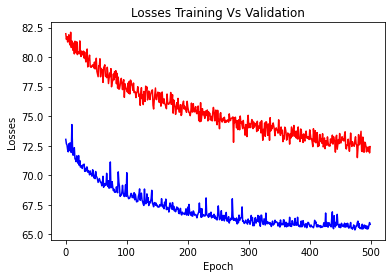

In [121]:
import matplotlib.pyplot as plt

plt.title('Losses Training Vs Validation')
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.plot(training_losses_history, '-r')
plt.plot(validation_losses_history, '-b')

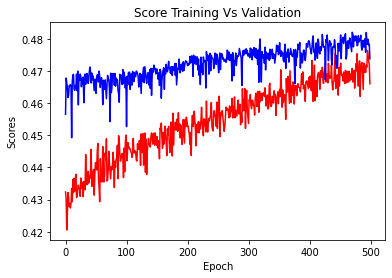

In [122]:
plt.title('Score Training Vs Validation')
plt.xlabel('Epoch')
plt.ylabel('Scores')
plt.plot(training_score_history, '-r')
plt.plot(validation_score_history, '-b')

In [123]:
def predections(dataloader):
  test_tm_predictions = []
  model.eval()
  with torch.no_grad():
    for x_batch in dataloader:
      x_batch = x_batch.to(DEVICE)
      tm_prediction = model(x_batch)
      test_tm_predictions.append(tm_prediction.cpu().numpy())
  return [tm.squeeze().tolist() for tm in test_tm_predictions]

In [124]:
tm = predections(test_loader)
test_seq_id = test_csv['seq_id']

In [125]:
df = pd.DataFrame({"seq_id":test_seq_id, "tm":tm })
df

,seq_id,tm
0,31390,57.878799
1,31391,57.746422
2,31392,57.855263
3,31393,57.466225
4,31394,57.939621
...,...,...
2408,33798,57.372192
2409,33799,57.990654
2410,33800,57.662758
2411,33801,57.869377


In [126]:
df.describe()[['tm']].transpose()


,count,mean,std,min,25%,50%,75%,max
tm,2413.0,57.939494,0.366577,56.997017,57.672119,57.939621,58.202148,58.948898


In [118]:
df.to_csv("submission.csv", index=False)